In [16]:
from rust import euler, analyt, heun, rk2a, rku4, pc45, rkf, pc4 # type: ignore
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
import timeit

plt.style.use('science')

In [17]:
cajta = np.linspace(0, 80, 1000)
analytical = analyt(cajta, 21)

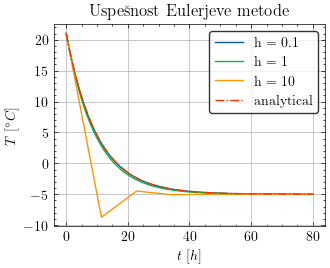

In [24]:
for h in [0.1, 1, 10]:
    t = np.linspace(0, 80, int(80/h))
    eul = euler(t, 21)
    plt.plot(t, eul, label=f'h = {h}')


plt.plot(cajta, analytical, '-.',label='analytical')
plt.grid()
plt.legend(
    facecolor="white",    # background color
    edgecolor="black",    # border color
    framealpha=0.8,       # transparency (1 is opaque)
    frameon=True          # ensure the frame is drawn
)
plt.title('Uspešnost Eulerjeve metode')
plt.xlabel('$t\\ [h]$')
plt.ylabel('$T\\ [^\\circ C]$')
plt.savefig('graphs/euly.pdf', dpi=512)

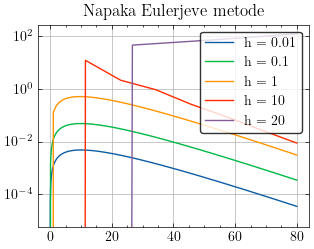

In [ ]:
for h in [0.01, 0.1, 1, 10, 20]:
    t = np.linspace(0, 80, int(80/h))
    eul = euler(t, 21)
    ana = analyt(t, 21)
    plt.plot(t, np.abs(np.array(eul) - np.array(ana)), label=f'h = {h}')

plt.grid()
plt.legend(
    facecolor="white",    # background color
    edgecolor="black",    # border color
    framealpha=0.8,       # transparency (1 is opaque)
    frameon=True          # ensure the frame is drawn
)
plt.title('Napaka Eulerjeve metode')
plt.yscale('log')
plt.xlabel('$t\\ [h]$')
plt.ylabel('$\\Delta T\\ [^\\circ C]$')
plt.savefig('graphs/euly_err.pdf', dpi=512)

In [26]:
euly = []
heuy = []
rk2y = []
rk4y = []
pc4y = []

eulyt = []
heuyt = []
rk2yt = []
rk4yt = []
pc4yt = []

hy = np.logspace(-4, -1, 30)
for h in hy:
    t = np.linspace(0, 80, int(80/h))
    analy = analyt(t, 21)
    eul = euler(t, 21)
    eulyt.append(timeit.timeit(lambda: euler(t, 21), number=10))
    euly.append(np.max(np.abs(np.array(eul) - np.array(analy))))
    heu = heun(t, 21)
    heuyt.append(timeit.timeit(lambda: heun(t, 21), number=10))
    heuy.append(np.max(np.abs(np.array(heu) - np.array(analy))))
    rk2 = rk2a(t, 21)
    rk2yt.append(timeit.timeit(lambda: rk2a(t, 21), number=10))
    rk2y.append(np.max(np.abs(np.array(rk2) - np.array(analy))))
    rk4 = rku4(t, 21)
    rk4yt.append(timeit.timeit(lambda: rku4(t, 21), number=10))
    rk4y.append(np.max(np.abs(np.array(rk4) - np.array(analy))))
    pc4mi = rku4(t, 21)
    pc4yt.append(timeit.timeit(lambda: pc4(t, 21), number=10))
    pc4y.append(np.max(np.abs(np.array(pc4mi) - np.array(analy))))


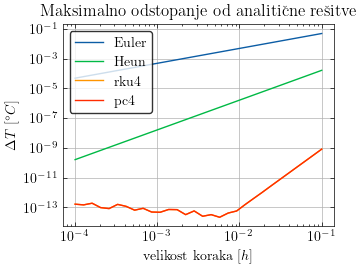

In [28]:
plt.plot(hy, euly, label='Euler')
plt.plot(hy, heuy, label='Heun')
# plt.plot(hy, rk2y, label='rk2a')
plt.plot(hy, rk4y, label='rku4')
plt.plot(hy, pc4y, label='pc4')

plt.xscale('log')
plt.yscale('log')

plt.xlabel('velikost koraka $[h]$')
plt.ylabel('$\\Delta T\\ [^\\circ C]$')

plt.grid()
plt.legend(
    facecolor="white",    # background color
    edgecolor="black",    # border color
    framealpha=0.8,       # transparency (1 is opaque)
    frameon=True          # ensure the frame is drawn
)

plt.title('Maksimalno odstopanje od analitične rešitve')
plt.savefig('graphs/errs.pdf', dpi=512)

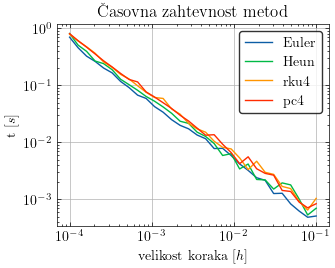

In [31]:
plt.plot(hy, eulyt, label='Euler')
plt.plot(hy, heuyt, label='Heun')
# plt.plot(hy, rk2y, label='rk2a')
plt.plot(hy, rk4yt, label='rku4')
plt.plot(hy, pc4yt, label='pc4')

plt.xscale('log')
plt.yscale('log')

plt.xlabel('velikost koraka $[h]$')
plt.ylabel('t $[s]$')

plt.grid()
plt.legend(
    facecolor="white",    # background color
    edgecolor="black",    # border color
    framealpha=0.8,       # transparency (1 is opaque)
    frameon=True          # ensure the frame is drawn
)

plt.title('Časovna zahtevnost metod')
plt.savefig('graphs/times.pdf', dpi=512)

In [53]:
tols = np.logspace(-14, -1, 100)
times = []
acts = []

for toly in tols:
    # print(toly)
    rkfy, t = rkf(0, 80, 21, tol=toly)
    analy = analyt(t, 21)
    times.append(timeit.timeit(lambda: rkf(0, 80, 21, tol=toly), number=100))
    acts.append(np.max(np.abs(np.array(rkfy) - np.array(analy))))

# plt.plot(t, rkfy)
# plt.plot(t, analy)
# plt.plot(np.abs(np.array(rkfy) - np.array(analy)))
# print(np.max(np.abs(np.array(rkfy) - np.array(analy))))
# plt.show()

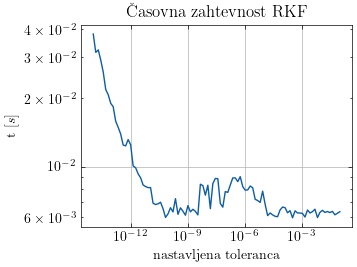

In [54]:
plt.plot(tols, times)

plt.xscale('log')
plt.yscale('log')

plt.xlabel('nastavljena toleranca')
plt.ylabel('t $[s]$')

plt.grid()

plt.title('Časovna zahtevnost RKF')
plt.savefig('graphs/rkft.pdf', dpi=512)

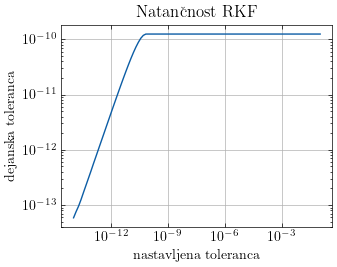

In [56]:
plt.plot(tols, acts)

plt.xscale('log')
plt.yscale('log')

plt.xlabel('nastavljena toleranca')
plt.ylabel('dejanska toleranca')

plt.grid()

plt.title('Natančnost RKF')
plt.savefig('graphs/rkferr.pdf', dpi=512)